##1. Mounting gdrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


##2. Importing Libraries

In [ ]:
import numpy as np # mathematical calculations
import pandas as pd # manipulating raw data
import matplotlib.pyplot as plt # ploting graphs for data visualisation
%matplotlib inline  

In [ ]:
path = '/gdrive/My Drive/ML1 Course1 Sept 2020/Data/'

In [ ]:
raw_data = pd.read_csv(path + 'Fish.csv')

In [ ]:
raw_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
raw_data.tail(6)

,Species,Weight,Length1,Length2,Length3,Height,Width
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


##3. Encoding text categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# area,sale_cond etc are character so convert it to numbers 

Species_labelencoder = LabelEncoder()
raw_data['Species'] = Species_labelencoder.fit_transform(raw_data['Species'])

In [ ]:
raw_data.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
149,5,9.8,10.7,11.2,12.4,2.0832,1.2772
150,5,8.7,10.8,11.3,12.6,1.9782,1.2852
151,5,10.0,11.3,11.8,13.1,2.2139,1.2838
152,5,9.9,11.3,11.8,13.1,2.2139,1.1659
153,5,9.8,11.4,12.0,13.2,2.2044,1.1484
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672
158,5,19.9,13.8,15.0,16.2,2.9322,1.8792


##4. Feature Scaling

In [ ]:
data = (raw_data - raw_data.mean())/(raw_data.max() - raw_data.min())

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-0.377358,-0.094743,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,-0.377358,-0.065652,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,-0.377358,-0.035349,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,-0.377358,-0.021410,0.001026,0.010623,0.038395,0.218184,0.005358
4,-0.377358,0.019196,0.004909,0.010623,0.046840,0.201584,0.100997


In [ ]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,0.455975,-0.234016,-0.286353,-0.294831,-0.301133,-0.399370,-0.426236
155,0.455975,-0.233289,-0.282469,-0.291195,-0.299443,-0.379659,-0.443799
156,0.455975,-0.234016,-0.274702,-0.280286,-0.294376,-0.388540,-0.445659
157,0.455975,-0.229471,-0.253343,-0.256650,-0.270727,-0.353958,-0.331287
158,0.455975,-0.229349,-0.241693,-0.243922,-0.253835,-0.350510,-0.357787


##5. Sperate X and Y

In [ ]:
X = data.drop(columns = ['Weight'])
Y = data.iloc[:, 1:2]  # y = data["Weight"]

##6. Inserting bias term

In [ ]:
X.insert(0, 'Bias', 1)

In [ ]:
X.head()

,Bias,Species,Length1,Length2,Length3,Height,Width
0,1,-0.377358,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,1,-0.377358,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,1,-0.377358,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,1,-0.377358,0.001026,0.010623,0.038395,0.218184,0.005358
4,1,-0.377358,0.004909,0.010623,0.046840,0.201584,0.100997


In [ ]:
X.tail()

,Bias,Species,Length1,Length2,Length3,Height,Width
154,1,0.455975,-0.286353,-0.294831,-0.301133,-0.399370,-0.426236
155,1,0.455975,-0.282469,-0.291195,-0.299443,-0.379659,-0.443799
156,1,0.455975,-0.274702,-0.280286,-0.294376,-0.388540,-0.445659
157,1,0.455975,-0.253343,-0.256650,-0.270727,-0.353958,-0.331287
158,1,0.455975,-0.241693,-0.243922,-0.253835,-0.350510,-0.357787


In [ ]:
Y.head()

,Weight
0,-0.094743
1,-0.065652
2,-0.035349
3,-0.021410
4,0.019196


In [ ]:
X.shape, Y.shape

((159, 7), (159, 1))

##7. Splitting the data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
X_train = np.matrix(X_train)
Y_train = np.matrix(Y_train)

In [ ]:
theta = np.matrix(np.zeros(7))

In [ ]:
theta.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1, 7), (119, 7), (40, 7), (119, 1), (40, 1))

##8. Defining Cost function and Gradient Descent function

In [ ]:
def ComputeError(x, y, theta):
    inner = np.power((x * theta.T - y),2)
    return np.sum(inner)/(2 * len(x))

In [ ]:
ComputeError(X_train, Y_train, theta)

0.02407492415224953

In [ ]:
learn_rate = 0.01
iters = 50000
def gradientDescent(x, y, theta, learn_rate,iters):
    temp = np.matrix(np.zeros(theta.shape)) # creating temp matrx to update the value of theta
    parameters = theta.shape[1] # number of parameters
    cost = [] #list to track the cost at all iters

    for i in range(iters):
        error = (x * theta.T)-y

        for j in range(parameters): #update the value of theta
            gradient = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((learn_rate/len(x)) * np.sum(gradient)) #assigned to temp matrix
        
        theta = temp #simultaneously update all the values of theta
        
        cost_iter = ComputeError(x,y,theta) #find the cost for the iteration

        cost.append(cost_iter)
    
    return theta,cost

In [ ]:
new_theta,cost = gradientDescent(X_train,Y_train,theta,learn_rate,iters)

##9. Plot the cost and number of iterations

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error Vs Iterations')

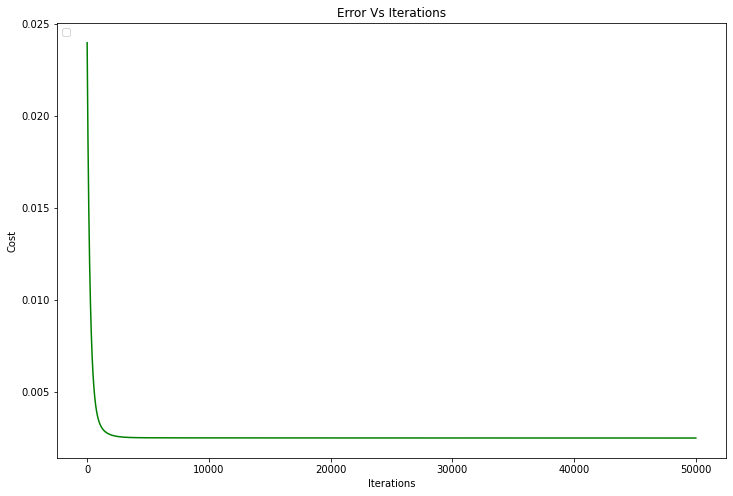

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'g')
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

##10. Predicting Training data

In [ ]:
Train_model_price = X_train * new_theta.T # predicting training data

##11. Predicting Test data

In [ ]:
X_test = np.matrix(X_test)
Y_test = np.matrix(Y_test)
Test_model_price = X_test * new_theta.T

## 12. Computation of error and Accuracy - Training Error

In [ ]:
from sklearn.metrics import mean_absolute_error

Train_Error = mean_absolute_error(Train_model_price,Y_train)
Train_Accuracy = 1 - Train_Error

print('Train Error = {} %'.format((round(Train_Error*100,2))))
print('Train Accuracy = {} %'.format((round(Train_Accuracy*100,2))))

Train Error = 5.46 %
Train Accuracy = 94.54 %


##13. Computation of error and Accuracy - Test Error

In [ ]:
from sklearn.metrics import mean_absolute_error

Test_Error = mean_absolute_error(Test_model_price,Y_test)
Test_Accuracy = 1 - Test_Error

print('Test Error = {} %'.format((round(Test_Error*100,2))))
print('Test Accuracy = {} %'.format((round(Test_Accuracy*100,2))))

Test Error = 5.83 %
Test Accuracy = 94.17 %
